В этом блокноте приведены примеры подбора гиперпараметров для моделей из sklearn и lightGBM с помощью библиотеки albridge_lib (рабочее название).  
Основное назначение библиотеки - автоматизировать вывод данных с результатами перебора гиперпараментров, в т.ч. строить графики.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb

In [2]:
import sys  
sys.path.insert(0, 'C:\\Users\\albri\\Jupiter Workspace')
import albridge_lib as alb

In [3]:
pd.options.display.expand_frame_repr = False
pd.set_option('display.max_columns', None)

## 1 Загрузка данных

In [4]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
print(X.shape, y.shape)

(506, 13) (506,)


Т.к. цель этого блокнота - демонстрация работы библиотеки, исследовательский анализ, нормализацию данных, разделение на обучающую и тестовую выборки и т.д. выполнять не будем

## 2. Работа с моделями sklearn
Метод sklearn_gridCV выполняет кросс-валидацию с подбором гиперпараметров по сетке

#### 2.1 Простая кросс-валидация

In [5]:
model = LinearRegression()
alb.sklearn_gridCV(model, X, y, 'neg_root_mean_squared_error')

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best valid score: 5.829 (1.777)


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.1s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    1.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished


#### 2.2 Поиск по сетке с построением графиков (один гиперпараметр)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0080s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0100s.) Setting batch_size=4.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished


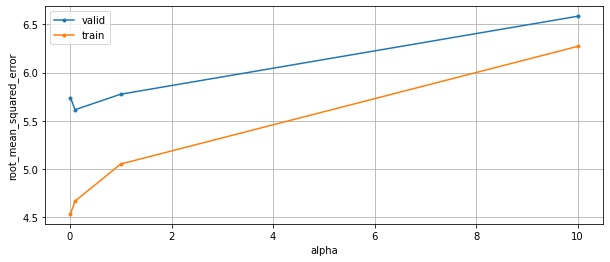

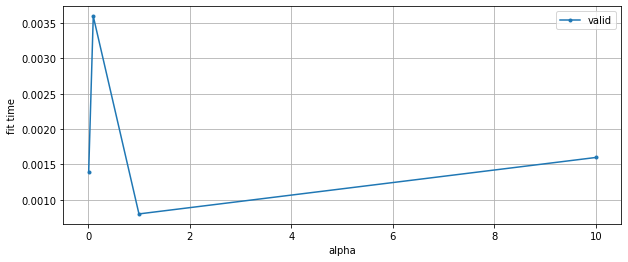

Best valid score: 5.615 (1.817)
Train score:      4.666 (0.499)
Best params: {'alpha': 0.1}


In [6]:
model = Lasso()
params = {'alpha': [0.01, 0.1, 1, 10]}
res = alb.sklearn_gridCV(model, X, y, 'neg_root_mean_squared_error', params, fit_train=True, plot_time=True)

Отдельно можно вывести таблицу со всеми результатами (pandas Dataframe)

In [7]:
res

,cv score,cv std,time,train score,train std
{'alpha': 0.01},5.740,1.802,0.001,4.533,0.481
{'alpha': 0.1},5.615,1.817,0.004,4.666,0.499
{'alpha': 1},5.776,1.473,0.001,5.051,0.422
{'alpha': 10},6.586,1.761,0.002,6.273,0.333


Удобно вывести значимость признаков для лучшей модели. В данном случае нужно обучить ее заново.

In [8]:
alb.get_feature_importance(Lasso(alpha=0.1), X, y, fit=True)

,lr coef,abs coef
5,3.703,3.703
7,-1.161,1.161
3,0.955,0.955
10,-0.771,0.771
12,-0.569,0.569
8,0.275,0.275
0,-0.098,0.098
1,0.049,0.049
2,-0.037,0.037
9,-0.015,0.015


#### 2.3 Поиск по сетке с построением графиков (два гиперпараметра)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0420s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0120s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0250s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0499s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1101s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 246 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:    0.3s
[Parallel(n

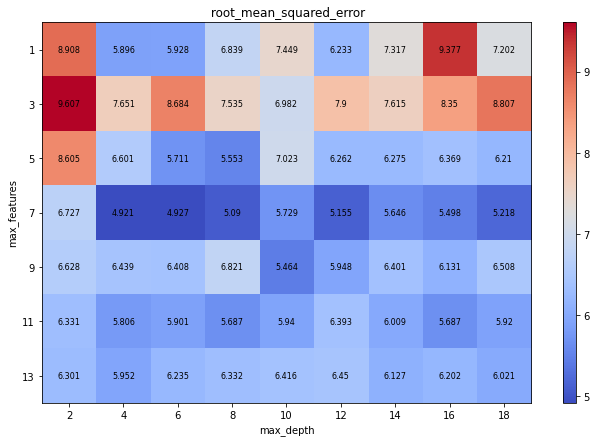

Best valid score: 4.921 (1.384)
Train score:      3.236 (0.096)
Best params: {'max_depth': 4, 'max_features': 7}
Wall time: 1.33 s


In [9]:
%%time
model = DecisionTreeRegressor(random_state=123)
params = {'max_depth': range(2,20,2), 'max_features': range(1, 14, 2)}
res = alb.sklearn_gridCV(model, X, y, 'neg_root_mean_squared_error', params, fit_train=True)

Таблица с результатами по-прежнему на месте

In [10]:
res

,cv score,cv std,time,train score,train std
"{'max_depth': 2, 'max_features': 1}",8.908,2.208,0.001,7.468,0.464
"{'max_depth': 2, 'max_features': 3}",9.607,2.062,0.002,7.774,0.502
"{'max_depth': 2, 'max_features': 5}",8.605,1.671,0.001,7.400,0.455
"{'max_depth': 2, 'max_features': 7}",6.727,1.570,0.001,6.359,0.423
"{'max_depth': 2, 'max_features': 9}",6.628,1.680,0.002,5.419,0.527
...,...,...,...,...,...
"{'max_depth': 18, 'max_features': 5}",6.210,2.114,0.003,0.049,0.059
"{'max_depth': 18, 'max_features': 7}",5.218,0.953,0.003,0.024,0.032
"{'max_depth': 18, 'max_features': 9}",6.508,1.215,0.004,0.033,0.033
"{'max_depth': 18, 'max_features': 11}",5.920,1.806,0.004,0.042,0.082


Таблица со значимостью признаков запрашивается одинаково независимо от типа модели (деревья или линейная)

In [11]:
model = DecisionTreeRegressor(random_state=123, max_depth=4, max_features=7)
alb.get_feature_importance(model, X, y, fit=True)

,importance
12,0.366
10,0.321
5,0.154
0,0.084
7,0.071
11,0.005
1,0.000
2,0.000
3,0.000
4,0.000


### 3 Работа с LightGBM

Подготовим датасет для LGB

In [12]:
lgb_data = lgb.Dataset(X, label=y, free_raw_data=False, silent=True)
lgb_data.construct()

Кроссвалидация с отображением метрики по итерациям. Указываем данные, метрику, кол-во итераций и параметры модели. Можно также запросить значимость признаков

[10]	cv_agg's rmse: 5.05512 + 0.43503
[20]	cv_agg's rmse: 3.96717 + 0.628735
[30]	cv_agg's rmse: 3.60498 + 0.710401
[40]	cv_agg's rmse: 3.47005 + 0.745119
[50]	cv_agg's rmse: 3.39601 + 0.775091
[60]	cv_agg's rmse: 3.35549 + 0.78462
[70]	cv_agg's rmse: 3.32211 + 0.772068
[80]	cv_agg's rmse: 3.30779 + 0.7566
[90]	cv_agg's rmse: 3.30109 + 0.737772
[100]	cv_agg's rmse: 3.28445 + 0.734629
Best res: 3.28445
Best iteration: 99
Last res: 3.28445


,feature,importance
0,Column_12,1201
1,Column_7,1111
2,Column_5,1048
3,Column_6,873
4,Column_0,787
5,Column_11,666
6,Column_4,550
7,Column_10,404
8,Column_9,348
9,Column_2,266


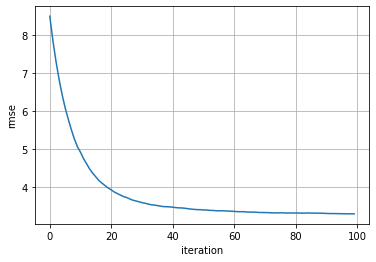

In [13]:
params = {'n_jobs': -1, 'verbose': -1}
alb.lgb_cv(lgb_data, 'rmse', 100, params, feature_importance=True)

Поиск по сетке аналогичный тому, как это делается в sklearn. Нужно передать в функцию параметры модели и параметры сетки.

params={'max_depth': 2}  res=3.451750  iter=99
params={'max_depth': 4}  res=3.377820  iter=99
params={'max_depth': 6}  res=3.366420  iter=99
params={'max_depth': 8}  res=3.298590  iter=98
params={'max_depth': 10}  res=3.279660  iter=99
params={'max_depth': 12}  res=3.262620  iter=99
params={'max_depth': 14}  res=3.285200  iter=99
params={'max_depth': 16}  res=3.284450  iter=99
params={'max_depth': 18}  res=3.284450  iter=99


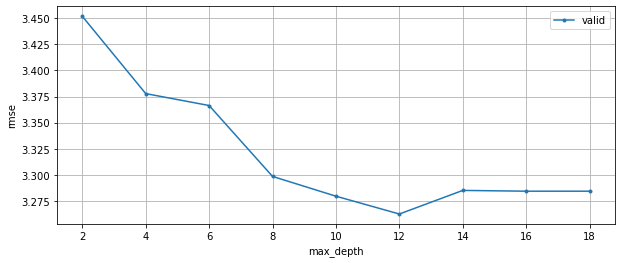

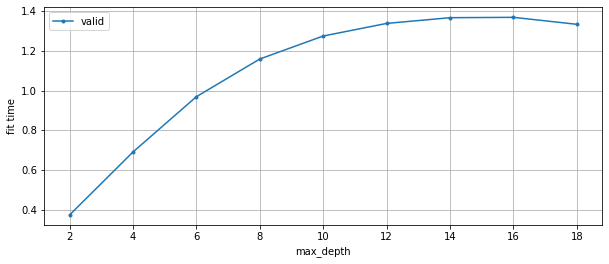

Best cv score: 3.26262
Best params: {'max_depth': 12}
Best iteration: 99


In [14]:
model_params = {'n_jobs': -1, 'verbose': -1}
grid_params = {'max_depth': range(2,20,2)}
res = alb.lgb_gridCV(lgb_data, 'rmse', N=100, model_params=model_params, grid_params=grid_params, plot_time=True)

In [15]:
res

,cv score,iter,time
{'max_depth': 2},3.452,99,0.373
{'max_depth': 4},3.378,99,0.690
{'max_depth': 6},3.366,99,0.969
{'max_depth': 8},3.299,98,1.159
{'max_depth': 10},3.280,99,1.275
{'max_depth': 12},3.263,99,1.338
{'max_depth': 14},3.285,99,1.367
{'max_depth': 16},3.284,99,1.369
{'max_depth': 18},3.284,99,1.334
